In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization, MultiHeadAttention, LayerNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import Dropout
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from scipy.stats import ks_2samp, pearsonr
from tensorflow.keras import layers
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import truncnorm, gaussian_kde
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings
import random
import tensorflow as tf
import os

In [ ]:
df = pd.read_csv('billboard.csv')
df.head()

,Place on Chart,Track Name,Artist,Year on Billboard Hot 100 Year-End Chart,Duration,Genres,Track Link,Tempo (BPM),Energy,Loudness,...,Valence,Acousticness,Instrumentalness,Liveness,Speechiness,Popularity,Album,Release Year,Genres 2,extended_genres
0,1.0,The Battle Of New Orleans,Johnny Horton,1959.0,02:31,"Pop, Country",https://open.spotify.com/track/3yGBZhx76zB4IjJ...,177.301,0.824,-9.663,...,0.915,0.796,0.0,0.1530,0.1310,11.0,The Best Of The 50's (Fifties),2007,"Pop, Country","classic country pop, cowboy western"
1,2.0,Mack The Knife,Bobby Darin,1959.0,03:08,"Jazz, Pop, Rock",https://open.spotify.com/track/5YjNeVkJ8i6mgdV...,83.019,0.697,-5.408,...,0.549,0.768,0.0,0.1050,0.0702,0.0,Beyond The Sea,2011,"Jazz, Pop, Rock","adult standards, easy listening, lounge, rock-..."
2,3.0,Personality,Lloyd Price,1959.0,02:35,"Pop, Blues, Soul, Rock",https://open.spotify.com/track/6WS5WiwzctmnI8Y...,64.524,0.701,-3.096,...,0.851,0.278,0.0,0.2530,0.0290,0.0,American Graffiti - '50s Rock N' Roll (Soundtr...,2009,"Pop, Blues, Soul, Rock","doo-wop, louisiana blues, memphis blues, new o..."
3,4.0,Venus - Re-Recorded,Frankie Avalon,1959.0,02:24,"Jazz, Pop, Rock",https://open.spotify.com/track/2Dpu1Kl8KXUq65S...,115.149,0.402,-13.809,...,0.773,0.584,1.67e-05,0.0866,0.0315,0.0,Pure Love Moods Vol. 1,2007,"Jazz, Pop, Rock","adult standards, bubblegum pop, doo-wop, easy ..."
4,5.0,Lonely Boy,Paul Anka,1959.0,02:31,"Jazz, Pop, Rock",https://open.spotify.com/track/4kh2S9hRpPvoF9J...,106.163,0.605,-9.923,...,0.804,0.352,0.0,0.1010,0.0306,40.0,Put Your Head On My Shoulder: The Very Best Of...,2000,"Jazz, Pop, Rock","adult standards, canadian pop, easy listening,..."


In [ ]:
df.describe()

,Place on Chart,Year on Billboard Hot 100 Year-End Chart,Tempo (BPM),Energy,Loudness,Key,Mode,Danceability,Valence,Acousticness,Liveness,Speechiness,Popularity,Release Year
count,6497.000000,6497.000000,6490.000000,6490.000000,6490.000000,6490.000000,6490.000000,6490.000000,6490.000000,6490.000000,6490.000000,6490.000000,6491.000000,6500.000000
mean,50.477297,1991.004002,119.736483,0.620511,-8.297094,5.254391,0.694761,0.627586,0.602390,0.263811,0.176475,0.073097,41.544600,1998.674154
std,28.855607,18.763714,27.901851,0.189874,3.507127,3.586309,0.460544,0.150088,0.240437,0.261558,0.144734,0.078672,26.484952,15.651291
min,1.000000,1959.000000,49.824000,0.020000,-29.877000,0.000000,0.000000,0.133000,0.037200,0.000017,0.018700,0.022300,0.000000,1900.000000
25%,25.000000,1975.000000,98.659500,0.486000,-10.430750,2.000000,0.000000,0.532000,0.416000,0.043500,0.086400,0.032200,19.000000,1988.000000
50%,50.000000,1991.000000,118.403000,0.635000,-7.692000,5.000000,1.000000,0.640000,0.621000,0.170000,0.122000,0.042050,47.000000,2002.000000
75%,75.000000,2007.000000,135.010750,0.768750,-5.620000,8.000000,1.000000,0.733000,0.808750,0.428000,0.221000,0.069900,63.000000,2010.000000
max,100.000000,2023.000000,210.855000,0.997000,2.769000,11.000000,1.000000,0.988000,0.991000,0.992000,0.992000,0.619000,90.000000,2024.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Place on Chart                            6497 non-null   float64
 1   Track Name                                6500 non-null   object 
 2   Artist                                    6500 non-null   object 
 3   Year on Billboard Hot 100 Year-End Chart  6497 non-null   float64
 4   Duration                                  6500 non-null   object 
 5   Genres                                    6177 non-null   object 
 6   Track Link                                6491 non-null   object 
 7   Tempo (BPM)                               6490 non-null   float64
 8   Energy                                    6490 non-null   float64
 9   Loudness                                  6490 non-null   float64
 10  Key                                 

In [ ]:
df = df.dropna(subset=['Tempo (BPM)', 'Energy', 'Loudness', 'Key', 'Danceability',
                        'Valence', 'Acousticness', 'Liveness', 'Speechiness'])


In [ ]:
def outlier_check(row, colname):
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier

outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    outliers_in_col = outlier_check(df, col)
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
print('Liczba wartości odstających', len(outliers))
df = df[~df.index.isin(outliers.index)]

Liczba wartości odstających 1492


In [ ]:
df = df[~df.index.isin(outliers.index)]
df.shape

(5000, 23)

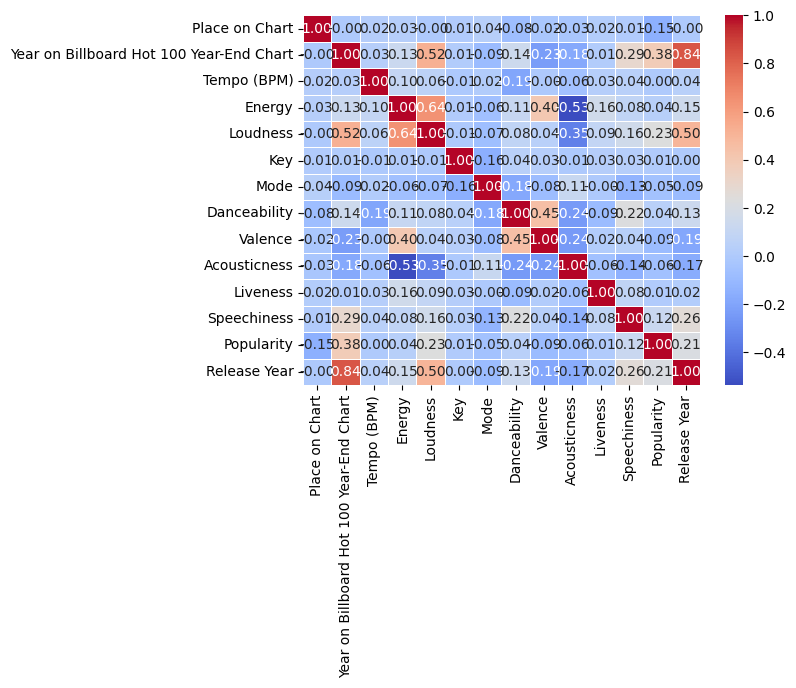

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidth=.5)
plt.show()

In [ ]:
def real_vs_predicted_plot(model, y_test, y_pred):
    y_test = y_test.flatten() if len(y_test.shape) > 1 else y_test
    y_pred = y_pred.flatten() if len(y_pred.shape) > 1 else y_pred

    mse, r2 = metrics(y_test, y_pred)

    sns.set_style("whitegrid")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Przewidywania')
    plt.plot(
        [min(y_test), max(y_test)], [min(y_test), max(y_test)],
        color='red', linestyle='--', linewidth=2, label='Idealna linia (y=x)'
    )


    plt.text(
        0.05, 0.95, f'$R^2 = {r2:.2f}$',
        transform=plt.gca().transAxes,
        fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    plt.xlabel('Rzeczywiste wartości', fontsize=12)
    plt.ylabel('Przewidywane wartości', fontsize=12)
    plt.title(f'Rzeczywiste vs przewidywane ({model})', fontsize=14, fontweight='bold')

    plt.grid(visible=True, which='major', linestyle='--', alpha=0.6)
    plt.legend(fontsize=10)

    min_val = min(min(y_test), min(y_pred))
    max_val = max(max(y_test), max(y_pred))
    plt.xlim(min_val - 0.1 * abs(min_val), max_val + 0.1 * abs(max_val))
    plt.ylim(min_val - 0.1 * abs(min_val), max_val + 0.1 * abs(max_val))

    plt.tight_layout()
    plt.show()

# funkcja do pobierania metryk
def metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return mse, r2

# Funkcja do wyświetlania metryk (r2, mse) pojedynczego modelu
def print_model_metrics(model_name, y_test, y_pred, model_params=None):
  mse, r2 = metrics(y_test, y_pred)
  print(f"Model: {model_name}")
  print(f"MSE: {mse:.3f}")
  print(f"R2: {r2:.3f}")
  if model_params != None:
    for param, value in model_params.items():
      print(f"{param}: {value}")

# funkcja która dodaje model do porównania
def add_to_comparision(model_name, mse, r2, y_pred, best_params={}):
  model_results.append({
      'Model': model_name,
      'Mean Squared Error': mse,
      'R-squared Score': r2,
      'y_pred' : y_pred,
      'best_params' : best_params
  })

In [ ]:
feature_columns = ['Tempo (BPM)', 'Energy', 'Loudness', 'Key', 'Danceability',
                  'Valence', 'Acousticness', 'Liveness', 'Speechiness']

X = df[feature_columns]
y = df['Year on Billboard Hot 100 Year-End Chart']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Kształt danych treningowych (X):", X_train.shape)
print("Kształt danych testowych (X):", X_test.shape)
print("Kształt etykiet treningowych (y):", y_train.shape)
print("Kształt etykiet testowych (y):", y_test.shape)


print("\nPodstawowe statystyki dla cech:")
print(X.describe())

Kształt danych treningowych (X): (4000, 9)
Kształt danych testowych (X): (1000, 9)
Kształt etykiet treningowych (y): (4000,)
Kształt etykiet testowych (y): (1000,)

Podstawowe statystyki dla cech:
       Tempo (BPM)       Energy     Loudness          Key  Danceability  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean    119.604941     0.647382    -7.658038     5.281400      0.650110   
std      27.679812     0.177965     3.245180     3.618347      0.144449   
min      51.316000     0.034800   -24.709000     0.000000      0.133000   
25%      98.767500     0.520000    -9.560000     2.000000      0.560000   
50%     118.039000     0.662000    -6.973000     5.000000      0.662000   
75%     134.975000     0.789000    -5.239000     8.000000      0.752000   
max     210.855000     0.997000    -0.990000    11.000000      0.988000   

           Valence  Acousticness     Liveness  Speechiness  
count  5000.000000   5000.000000  5000.000000  5000.000000  
mean 

In [ ]:
df = df.dropna()


acoustic_features = ['Tempo (BPM)', 'Energy', 'Loudness', 'Key', 'Danceability',
                     'Valence', 'Acousticness', 'Liveness', 'Speechiness']
df = df[['Year on Billboard Hot 100 Year-End Chart'] + acoustic_features]


scaler = StandardScaler()
df[acoustic_features] = scaler.fit_transform(df[acoustic_features])


def create_sequences(df, target_columns, sequence_length=5):
    X, y = [], []
    features = df[target_columns].values
    for i in range(len(df) - sequence_length):
        X.append(features[i:i+sequence_length].flatten())
        y.append(df['Year on Billboard Hot 100 Year-End Chart'].iloc[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5
X, y = create_sequences(df, acoustic_features, sequence_length)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modele regresji


In [ ]:
model_results = []

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "Elastic Net": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Lasso": Lasso(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - R² Score: {r2:.3f}")
    model_results.append({
        "Model": name,
        "R-squared Score": r2,
        "Mean Squared Error": mse,
        "y_pred": y_pred,
        "best_params": {k: v for k, v in model.get_params().items() if k in ['alpha', 'max_depth', 'n_estimators', 'learning_rate', 'C', 'kernel', 'n_neighbors', 'l1_ratio']}
    })

#Tworzenie DF z wynikami
model_results_df = pd.DataFrame(model_results)
model_results_df.sort_values(by='R-squared Score', ascending=False, inplace=True)
model_results_df = model_results_df.reset_index(drop=True)


print("\nModel Performance Summary:")
display_df = model_results_df.drop(['y_pred'], axis=1)
print(display_df)




Linear Regression - R² Score: 0.775
Ridge Regression - R² Score: 0.775
Decision Tree - R² Score: 0.502
Random Forest - R² Score: 0.751
Gradient Boosting - R² Score: 0.786
SVR - R² Score: 0.747
KNeighbors - R² Score: 0.676
Elastic Net - R² Score: 0.695
Lasso - R² Score: 0.686

Model Performance Summary:
               Model  R-squared Score  Mean Squared Error  \
0  Gradient Boosting         0.785703           47.850908   
1  Linear Regression         0.775155           50.206305   
2   Ridge Regression         0.775152           50.206931   
3      Random Forest         0.751440           55.501767   
4                SVR         0.747339           56.417387   
5        Elastic Net         0.695012           68.101612   
6              Lasso         0.685934           70.128828   
7         KNeighbors         0.676033           72.339606   
8      Decision Tree         0.501549          111.300701   

                                         best_params  
0  {'alpha': 0.9, 'learning_ra

Boosting

In [ ]:
xgb_model = XGBRegressor()
param_grid = {'n_estimators': [100, 300], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7]}
search = GridSearchCV(xgb_model, param_grid, scoring='r2', cv=5)
search.fit(X_train, y_train)
y_pred_xgb = search.best_estimator_.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - R² Score: {r2_score(y_test, y_pred_xgb):.3f}")
add_to_comparision("XGBoost", mean_squared_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb), y_pred_xgb, search.best_params_)

XGBoost - R² Score: 0.808


In [ ]:
lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print(f"LightGBM - R² Score: {r2_score(y_test, y_pred_lgbm):.3f}")

add_to_comparision("LightGBM", mse_lgbm, r2_lgbm, y_pred_lgbm)


LightGBM - R² Score: 0.815


In [ ]:
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
print(f"CatBoost - R² Score: {r2_cat:.3f}")

add_to_comparision("CatBoost", mse_cat, r2_cat, y_pred_cat)


CatBoost - R² Score: 0.822


**Sieci neuronowe**


In [ ]:
#Tworzenie LSTM i GRU
acoustic_features = [
    'Tempo (BPM)', 'Energy', 'Loudness', 'Key', 'Danceability',
    'Valence', 'Acousticness', 'Liveness', 'Speechiness'
]

df = df[['Year on Billboard Hot 100 Year-End Chart'] + acoustic_features]
df = df.dropna()


scaler = StandardScaler()
df[acoustic_features] = scaler.fit_transform(df[acoustic_features])


def create_sequences(df, target_columns, sequence_length):
    X, y = [], []
    features = df[target_columns].values
    for i in range(len(df) - sequence_length):
        X.append(features[i:i+sequence_length])
        y.append(np.mean(features[i+1:i+sequence_length+1], axis=0))
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(df, target_columns=acoustic_features, sequence_length=sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(model_type='LSTM'):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    elif model_type == 'GRU':
        model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    if model_type == 'LSTM':
        model.add(LSTM(64, activation='relu', return_sequences=True))
    else:
        model.add(GRU(64, activation='relu', return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    if model_type == 'LSTM':
        model.add(LSTM(32, activation='relu'))
    else:
        model.add(GRU(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len(acoustic_features), activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

lstm_model = build_model('LSTM')
gru_model = build_model('GRU')

lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

lstm_model.save('lstm_model.h5')
gru_model.save('gru_model.h5')

# Sprawdzanie poziomu predykcji modeli
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

evaluate_model(lstm_model, X_test, y_test, "LSTM Model")
evaluate_model(gru_model, X_test, y_test, "GRU Model")

y_pred_lstm = lstm_model.predict(X_test)
y_pred_gru = gru_model.predict(X_test)

add_to_comparision("LSTM", mean_squared_error(y_test, y_pred_lstm), r2_score(y_test, y_pred_lstm), y_pred_lstm)
add_to_comparision("GRU", mean_squared_error(y_test, y_pred_gru), r2_score(y_test, y_pred_gru), y_pred_gru)

Epoch 1/50
61/61 [==============================] - 9s 55ms/step - loss: 0.2861 - mae: 0.3911 - val_loss: 0.1766 - val_mae: 0.3352
Epoch 2/50
61/61 [==============================] - 3s 43ms/step - loss: 0.1207 - mae: 0.2746 - val_loss: 0.1734 - val_mae: 0.3331
Epoch 3/50
61/61 [==============================] - 3s 45ms/step - loss: 0.1026 - mae: 0.2526 - val_loss: 0.1656 - val_mae: 0.3264
Epoch 4/50
61/61 [==============================] - 4s 66ms/step - loss: 0.0925 - mae: 0.2402 - val_loss: 0.1517 - val_mae: 0.3128
Epoch 5/50
61/61 [==============================] - 3s 42ms/step - loss: 0.0848 - mae: 0.2297 - val_loss: 0.1358 - val_mae: 0.2956
Epoch 6/50
61/61 [==============================] - 3s 43ms/step - loss: 0.0789 - mae: 0.2223 - val_loss: 0.1109 - val_mae: 0.2669
Epoch 7/50
61/61 [==============================] - 3s 45ms/step - loss: 0.0748 - mae: 0.2149 - val_loss: 0.0867 - val_mae: 0.2351
Epoch 8/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0713 - m

In [ ]:
#Tworzenie TFT i N-Beats
def build_tft_model():
    input_shape = (sequence_length, X_train.shape[2])
    inputs = Input(shape=input_shape)
    attn = MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    norm = LayerNormalization()(attn)
    dense1 = Dense(128, activation='relu')(norm)
    drop1 = Dropout(0.3)(dense1)
    dense2 = Dense(64, activation='relu')(drop1)
    drop2 = Dropout(0.3)(dense2)
    flat = Flatten()(drop2)
    outputs = Dense(len(acoustic_features), activation='linear')(flat)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

tft_model = build_tft_model()
tft_history = tft_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)
y_pred_tft = tft_model.predict(X_test)
evaluate_model(tft_model, X_test, y_test, "TFT Model")
add_to_comparision("TFT", mean_squared_error(y_test, y_pred_tft), r2_score(y_test, y_pred_tft), y_pred_tft)


def build_nbeats_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    outputs = Dense(output_shape, activation='linear')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

input_shape = (sequence_length, len(acoustic_features))
output_shape = len(acoustic_features)
nbeats_model = build_nbeats_model(input_shape, output_shape)

nbeats_history = nbeats_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)
y_pred_nbeats = nbeats_model.predict(X_test)

evaluate_model(nbeats_model, X_test, y_test, "N-BEATS Model")
add_to_comparision("N-BEATS", mean_squared_error(y_test, y_pred_nbeats), r2_score(y_test, y_pred_nbeats), y_pred_nbeats)


Epoch 1/50
61/61 [==============================] - 3s 21ms/step - loss: 0.1061 - mae: 0.2504 - val_loss: 0.0493 - val_mae: 0.1748
Epoch 2/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0537 - mae: 0.1831 - val_loss: 0.0367 - val_mae: 0.1509
Epoch 3/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0435 - mae: 0.1649 - val_loss: 0.0338 - val_mae: 0.1447
Epoch 4/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0390 - mae: 0.1560 - val_loss: 0.0312 - val_mae: 0.1382
Epoch 5/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0359 - mae: 0.1497 - val_loss: 0.0290 - val_mae: 0.1339
Epoch 6/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0337 - mae: 0.1448 - val_loss: 0.0284 - val_mae: 0.1321
Epoch 7/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0326 - mae: 0.1424 - val_loss: 0.0273 - val_mae: 0.1301
Epoch 8/50
61/61 [==============================] - 2s 28ms/step - loss: 0.0315 - m

In [ ]:
#Tworzenie MLP
def build_mlp_model():
    input_shape = (sequence_length, X_train.shape[2])
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    outputs = Dense(len(acoustic_features), activation='linear')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

mlp_model = build_mlp_model()
mlp_history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

y_pred_mlp = mlp_model.predict(X_test)
evaluate_model(mlp_model, X_test, y_test, "MLP Model")
add_to_comparision("MLP", mean_squared_error(y_test, y_pred_mlp), r2_score(y_test, y_pred_mlp), y_pred_mlp)

Epoch 1/50
61/61 [==============================] - 2s 9ms/step - loss: 1.2526 - mae: 0.8672 - val_loss: 0.1434 - val_mae: 0.3028
Epoch 2/50
61/61 [==============================] - 0s 6ms/step - loss: 0.5526 - mae: 0.5818 - val_loss: 0.1188 - val_mae: 0.2753
Epoch 3/50
61/61 [==============================] - 0s 6ms/step - loss: 0.3595 - mae: 0.4687 - val_loss: 0.1004 - val_mae: 0.2520
Epoch 4/50
61/61 [==============================] - 0s 6ms/step - loss: 0.2553 - mae: 0.3952 - val_loss: 0.0855 - val_mae: 0.2318
Epoch 5/50
61/61 [==============================] - 0s 5ms/step - loss: 0.1948 - mae: 0.3462 - val_loss: 0.0755 - val_mae: 0.2173
Epoch 6/50
61/61 [==============================] - 0s 6ms/step - loss: 0.1575 - mae: 0.3121 - val_loss: 0.0678 - val_mae: 0.2058
Epoch 7/50
61/61 [==============================] - 0s 6ms/step - loss: 0.1298 - mae: 0.2840 - val_loss: 0.0617 - val_mae: 0.1957
Epoch 8/50
61/61 [==============================] - 1s 9ms/step - loss: 0.1111 - mae: 0.26

Porównanie wyników


In [ ]:
model_results_df = pd.DataFrame(model_results)
model_results_df.sort_values(by='R-squared Score', ascending=False, inplace=True)
model_results_df = model_results_df.reset_index(drop=True)
model_results_df.drop(['y_pred', 'best_params'], axis=1)

,Model,R-squared Score,Mean Squared Error
0,N-BEATS,0.889327,0.016368
1,MLP,0.879473,0.017751
2,TFT,0.868412,0.019682
3,GRU,0.857336,0.020832
4,LSTM,0.844569,0.022157
5,CatBoost,0.822495,39.635687
6,LightGBM,0.814952,41.319847
7,XGBoost,0.807734,42.931689
8,Gradient Boosting,0.785703,47.850908
9,Linear Regression,0.775155,50.206305


/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3473: UserWarning: FixedFormatter should only be used together with FixedLocator
  if (await self.run_code(code, result,  async_=asy)):


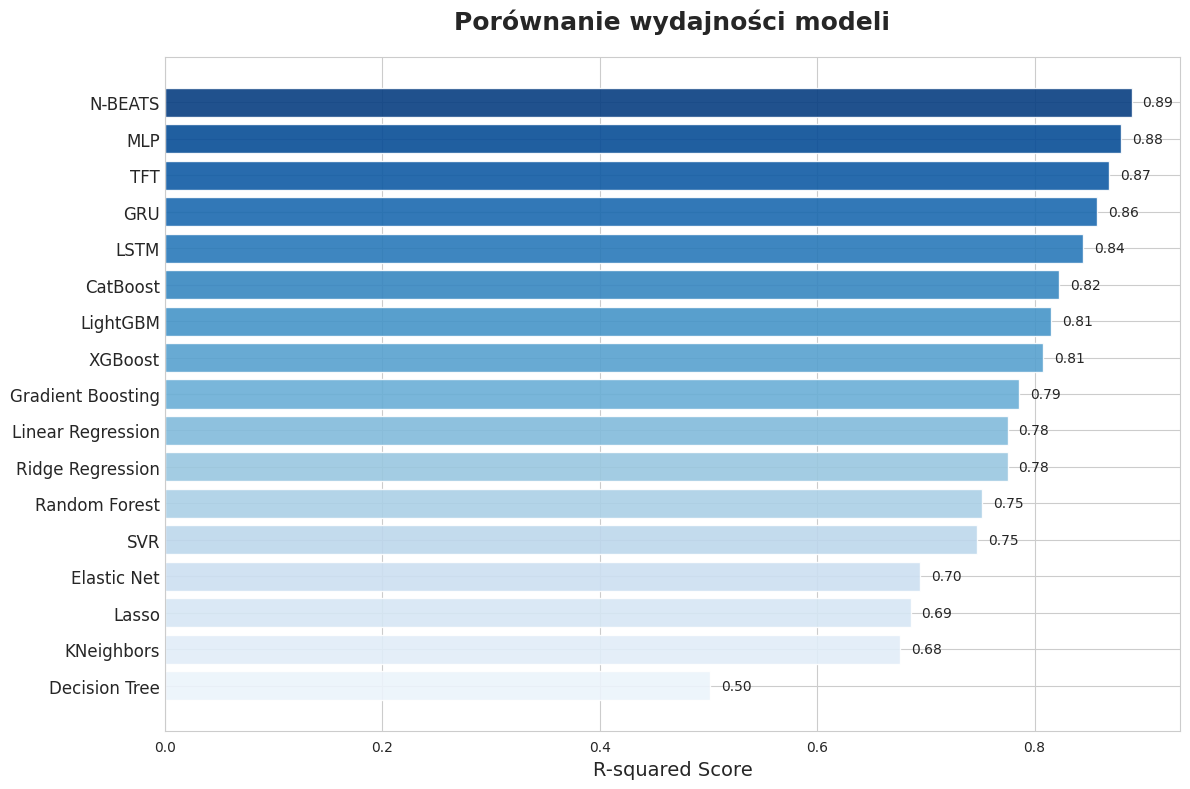

In [ ]:
model_results_df.sort_values(by='R-squared Score',inplace=True)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))

colors = sns.color_palette("Blues", len(model_results_df))

bars = ax.barh(
    model_results_df['Model'],
    model_results_df['R-squared Score'],
    color=colors,
    alpha=0.9
)

for bar, score in zip(bars, model_results_df['R-squared Score']):
    ax.text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{score:.2f}",
        va='center', fontsize=10
    )

ax.set_xlabel("R-squared Score", fontsize=14)
ax.set_title("Porównanie wydajności modeli", fontsize=18, fontweight='bold', pad=20)

ax.set_yticklabels(model_results_df['Model'], fontsize=12)
ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
plt.show()